# Counter Examples and Testing

In the last section we learned how to prove or verify things.  In this section we'll learn about one of the technique for proving mathematical statements: proof by counter example.  This powerful technique honestly doesn't get enough love or attention in most mathematical theory books.  This is likely because it's not terribly interesting from a purely theoretical perspective.  To carry out a proof by counter example, you simply need to find _some_ example that your statement fails on.  This is because mathematical statements are _either_ true or false, but never both.  We saw this in the last section with respect to logic.  

What is likely 'uninteresting' about proof by counterexample comes from a question - how do you intelligently guess a bad example?  If we _could_ do that, then we'd probably know ahead of time that our theorem or lemma was correct or incorrect ahead of time, right?

Well, it turns out, this is one of the great powers of computational systems.  We don't _need_ to guess intelligently when computers are involved, because we can guess thousands or millions or even _billions_ of times without doing very much work.  

In this chapter we will introduce a number of ideas which will aid us in finding counterexamples for conjectures regarding mathematical statements.  We will use Python in order to do this and a mental 'testing' framework.  Additionally, to ensure that our set up is not the reason that our tests pass, we will be running all of our tests in a tool called Docker.  In general, Docker will be useful throughout the book because of the content we will cover in the next section, however traditionally, it is taught along side testing, so we introduce it here.

Finally, we will need an understanding of randomness in order to intelligently search for counter examples, so we'll see some rudiments of probability and statistics in this chapter as well.

## Proof By Counter Example

Before we see how to do this in Python, let's look at some example proofs that make use of counterexamples.  As we stated above, proof by counterexample occurs when we come up with an example that disproves a conjecture.  Let's look at some example:

Conjecture:

The function $f(x) = x^{4}$ is bijective such that $f: \mathbb{R} \rightarrow \mathbb{R}$.

Disprove:

Note: Here we say disprove, because we are **not** trying to prove the conjecture, but refute it.

Assume $f(x) = x^{4}$ is a bijective function.  This implies that $\forall$ x in the domain such that x $\in \mathbb{R}$ there is _one and only one_ y in the codomain, such that y $\in \mathbb{R}$.

Counter example:

both (1, 1), (-1, 1) $\in f$:

$1^{4}$ = 1

$-1^{4}$ = 1

Thus, $x^{4}$ is *not* bijective.

QED.

The general structure of this proof by counter example was to state the condition required for the statement to be true, and then show that a specific example fails to meet that condition.

Conjecture:

Any function of the form $f(x) = x^{k}$ where k is even, in otherwords, k = 2 * l for some l $\in \mathbb{Z}$.

To show a counter example here, we need to cover every function such that $f(x) = x^{k}$ where k is even.

Choose a $\in \mathbb{R}$ and -a $\in \mathbb{R}$ as elements from the domain.   To get the corresponding elements in the codomain we simply do:

$$f(a) = a^{k} = a^{2l} = (a^{l})^{2}$$
$$f(-a) = -a^{k} = -a^{2l} = (-a^{l})^{2}$$

At this point we need a specific fact - 

Lemma: Any x $\in \mathbb{R}$ such that $x = y^{2}$ will be >= 0.

Proof:

Case 1: y > 0:

y > 0, therefore y * y > 0.

Case 2: y < 0:

y < 0, therefore we can do (-1) * y > 0.

((-1) * y) * ((-1) * y) > 0. (since we want to know the behavior of $y^{2}$).

(-1) * (-1) * y * y > 0. (rearranging because mutliplication is associative)

y * y > 0. (by -1 * -1 = 1 and 1 * a = a $\forall$a)

QED.

Back to the original proof.  Now we know $x^{2}$ > 0.  So we know:

$$ (a^{l})^{2} = (-a^{l})^{2} $$ 

Since the only difference between the left and right hand side of the equation is the `-` symbol.  Therefore,

(a, $a^{k}$), (-a, $a^{k}$) $\in f(x)= x^{k}$, $\forall k$ such that k is even.

So we have found _infinite_ counter examples.

QED.

Now that we understand how to prove things by counterexample, let's move onto how Python can aid us in looking for counterexamples through automation.

## Testing In Python

In the last section we looked at how to come up with counterexamples to falisfy conjectures.  Now we'll learn how to extend that to code.  The ideas are essentially analogous, so let's jump right into an example.

Suppose you have some code:

In [1]:
def multiplication(x, y):
    product = 0
    for _ in range(y):
        product += x
    return product

How can you be sure that the function works as expected?  The answer is to try _cases_.  These are specific examples we expect to work on the code, and the hope is that these examples are representative.

Let's write some tests for the above function:

In [2]:
def test_one_multiplication():
    assert multiplication(5, 6) == 30
    
def test_two_multiplication():
    assert multiplication(1, 6) == 6

def test_three_multiplication():
    assert multiplication(0, 6) == 0
    
def test_four_multiplication():
    assert multiplication(6, 1) == 6
    
def test_five_multiplication():
    assert multiplication(6, 0) == 0

def test_six_multiplication():
    assert multiplication(2.5, 2) == 5
    
def test_seven_multiplication():
    assert multiplication(2, 2.5) == 5

test_one_multiplication()
test_two_multiplication()
test_three_multiplication()
test_four_multiplication()
test_five_multiplication()
test_six_multiplication()
test_seven_multiplication()

TypeError: 'float' object cannot be interpreted as an integer

Looks like our implementation failed on test seven!  This is because we implemented multiplication in such a way as it does not succeed if the second parameter is a float.

In general testing is a way of assessing correctness, the same way that we can assess correctness for a proof.  It may seem like we haven't really done much, but testing allows us to have _assurance_ that our algorithms are correct on those specific cases.  So if there is something wrong with our implementation, we can always assess it.

In general the syntax for tests will always be:

```
def test_[number]_[function we are testing](param1, param2, .. paramN):
    some logic to set up the test goes here
    assert [function we are testing] == [some case where we know the expected output]
```

Notice the use of `assert` here.  The way `assert` works is, it checks a boolean.  

If the boolean is true - then nothing happens.
If the boolean is false - then an error is raised.

In this way we can _always_ tell if the program failed.  And it will fail _explicitly_.

Now that we know the basics of testing, time to go over some more technology that we'll be using throughout this book.

## Docker && Terraform

In general, algorithms will perform differently on different machines.  This might be because of the operating system, the version of programming language, in our case Python, or because of the hardware.  There isn't much we can do to assess hardware related performance checks, unless you happen to have a bunch of computers lying around.  But we _can_ check for differences in performance due to the operating system and the version of Python.  For this we are going to need to _simulate_ the operating system and version of Python.  Mostly because installing a bunch of different operating systems and Python versions on one physical computer is a giant pain.

For this we will be using Docker, a powerful and relatively easy to use tool for simulating an operating system.  As for what kinds of operating systems we'll be using - this will be only flavors of linux.  That's because windows isn't free, and the author feels charging someone for learning tools is unfair.  

### Installation

In order to get docker working please follow along with this [guide](https://docs.docker.com/get-docker/).  Make

Now that you have docker installed, please go ahead and register for [dockerhub](https://hub.docker.com/)

### Getting Started

Now that you have docker installed, let's talk about exactly how it works and what it is.  Docker is a "runtime" environment for "containers".  A container is like an operating system, except very tiny and only with the specific pieces you want.  You can have a container that does _everything_ a regular operating system does, but typically you only want or need certain parts of the operating system.  

Now that we've talked about _what_ docker is (a little), let's talk about why you would use it.  Docker allows you to package up an environment along with an application, and ensure that the application will always run, regardless of what machine it's on.  If you've ever tried to get someone else's application running from source, then you will understand just how powerful this is.  Before containers and Docker (which are two seperate things), it was _very_ hard for software engineers to package up their code into applications.  And many 'applications' you'd find on github and other open source systems would be _very_ hard to get running.  With containers, you can just pull down the environment that the original developers used, and run the code (assuming the container was created correctly).  More or less, in developer speak, containers let you "ship your machine" along with the code.  So you don't have to worry as much.

Now, why will we be using Docker?  This is getting a little ahead of things, but it's worth it to understand the motivation.  We are learning Docker/containers because not all operating systems will run the same code the same way.  And by using this technology we can ensure that we have enough statistically diverse environments to ensure we get an accurate measure of the algorithmic performance of our code.  If this motivation went over your head, don't worry too much.  We'll be introducing the analysis of algorithms soon.  And hopefully then it will make much more sense.

Alright!  Now it's time to try making some docker containers!  We'll start with the "hello world" example.  This is the example that does the _least_ amount possible.  So it should be the easiest for anyone to create.


First, create a directory called hello_world, then `cd` into that directory and then you'll save the following code to a file, hello_world.py:

In [ ]:
print("Hello World!")

If you aren't familiar with the command line, I highly recommend checking out:
* [this introduction](https://cs.lmu.edu/~ray/notes/bash/) 
* [this introduction](https://livecodestream.dev/post/introduction-to-bash-for-beginners/) 
* [this introduction](https://tldp.org/HOWTO/Bash-Prog-Intro-HOWTO.html) 
* [this cheatsheet](https://www.educative.io/blog/bash-shell-command-cheat-sheet)

Next, we'll create a file called a Dockerfile, this file store the instructions for creating our container:

```
FROM python:3.6-slim

WORKDIR /app

ADD . /app

RUN pip install -r requirements.txt

EXPOSE 80

ENV NAME HelloWorld

ENTRYPOINT ["python", "hello_world.py"]
```

Note: explain docker file code.

Now that you've got your Dockerfile and your code, you'll create your container with:

`docker build -t hello_world:0.1 .`

Okay now go ahead and run your docker container with:

`docker run -p 80:80 hello_world:0.1`

And that you've got the basics for dockerfiles you are ready to push your container up to dockerhub.  Then you can use the container from any machine!

Pulling down docker containers can be kinda a pain, so to use it, we'll make use of another technology: Terraform.

The reason we are introduing a second technology is, the author has created docker containers for each algorithm and pushed them to dockerhub, as well as included terraform scripts to pulldown each container.  So in order to make your life as well as the instructor's life easier, we are going to make use of this tool.

### Terraform

Terraform is a tool for deploying a service to some "infrastructure" this typically means the cloud, but in our case, it means to docker.  Using terraform it will be easy to download a given piece of code, run the code, get the necessary data from the code, and do the homeworks.  At first this make seem daunting, having to learn so many new technologies all in a row, but it will be to your benefit, as these tools are _also_ industry standard for computer scientists.

Because the Terraform documentation is so good, please head to the [official docs](https://learn.hashicorp.com/collections/terraform/docker-get-started) to get started with terraform

Now that you know how terraform works, let's run the following script to pull down our hello_world example:

In [4]:
#terraform script goes here

Recall from the tutorial we need to run:

* `terraform init`
* `terraform fmt`
* `terraform plan`
* `terraform apply`

from the command line.  Once we've done that, the docker container should be running!

Now that we've seen how to containerize our code.  And push and pull our containers, let's move onto some more testing paradigms.  

## Sequential Testing

If your algorithm is the first of it's kind to do a specific thing, then testing specific values is the best you can hope for.  That said, many algorithms actually do _the same thing_ just in different ways.  In this sense, we can think of an algorithm like a mathematical relation, except instead of one rule that gives us the mathematical rule on the relation, we can have _several_ primitives build up to a rule in different ways.  This difference in how primitives are used to build towards mathematical rules is what allows algorithms to vary in performance in terms of speed.  For algorithms, it is not enough to be correct, it is also about getting to the right answer quickly.  

Of course, correctness cannot always be guaranteed with an algorithm in absolute terms, the way it can be for a mathematical function.  This is due to the limited capacity of memory in computers - there is a finite amount of numbers a computer can accurately express, even when it comes to the integers.  This is even worse for the floating point numbers since even very small numbers, in terms of magnitude, can have many significant digits.  So, typically when we think of correctness for algorithms, we think about this in terms of some _large_ set of computables, but not _every_ number.  

Given the above notion of correctness, as well as the ability to choose from a variety of "correct" algorithms, it is often advantageous to choose a given correct, however possibly inefficient algorithm and use that as a sanity check for a range of values for a new and possibly more efficient algorithm.

### Example

A very common task in algorithms is sorting numbers.  Below we'll look at a very simple sorting routinue, that takes in a list of numbers and sorts them from lowest to highest:

In [1]:
def simple_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

Let's look at an example list and see the sorted list:

In [3]:
listing = [2,2,1,4,7,6,5]

simple_sort(listing)

[1, 2, 2, 4, 5, 6, 7]

As you can see, the sorting algorithm sorts all the numbers, even though there are repeats.  But how can we be sure that the sorting algorithm will work on a bunch of arrays?  For this we can come up with a test, however, it will require a _reference implementation_ of sorting, that we currently trust.  Fortunately Python comes with a builtin sort:

In [4]:
listing = [2,2,1,4,7,6,5]
listing.sort()
listing

[1, 2, 2, 4, 5, 6, 7]

All that remains now is to devise our test with sequentially increasing and diverse inputs:

In [5]:
def test_simple_sort_one():
    listing = []
    for element in range(1000):
        listing.insert(0, element)
        sorted_list = listing[:]
        sorted_list.sort()
        assert simple_sort(listing) == sorted_list
        
def test_simple_sort_two():
    listing = []
    for element in range(1000):
        listing.append(element)
        sorted_list = listing[:]
        sorted_list.sort()
        assert simple_sort(listing) == sorted_list

test_simple_sort_one()
test_simple_sort_two()

As you can see, we were able to easily verify _2000_ cases with just a few lines of code!  The above code does take a little while because our simple sort isn't terribly fast.  But we know it's correct!  Now let's look at an example that converts numbers to their binary representation.  

In general a binary number can represent _any_ integer and do so in a space efficient manner.  This means that we can _extend_ the limitation of our computational resources however we certainly still have _a limit_, it's just bigger!  Anywho, let's look at Python's implementation first:

In [6]:
bin(16)

'0b10000'

The leading 0b doesn't have anything to do with the number, it's just there to designate this as a binary number.  Let's look at a second example:

In [8]:
bin(3)

'0b11'

What should be clear from these two examples is how binary numbers appear as _even_ or _odd_ numbers.  Any even number will have a `0` in the position furthest to the right, while any odd number will have a `1` there.  That's because $2^{0}=1$.  In general the formula for a binary number is:

$$ membership(N) * 2^{N} + membership(N-1) * 2^{N-1} + ... + membership(1)*2^{1} + membership(0) *2^{0} $$

The $membership$ function indicates whether or not a given power of two is used in the binary representation.  If it is, then the $membership$ function returns 1, if it's not then the $membership$ function returns 0.  Then all the $membership$ function values are recorded, which is what gives us the binary number. 

So for the binary representation of the number 3, we first have to bound the number by the largest power of two, in this case it's 4, since 4 > 3.  Then we simply subtract off powers of two until we get to zero:

$$0 * 2^{2} + 1 * 2^{1} + 1 * 2^{0}$$

Hence our binary representation is, 011.

Let's write some code to capture this algorithm:

In [16]:
import math

def integer_to_binary(number):
    biggest_power_of_two = math.log(number, 2)
    if biggest_power_of_two == math.ceil(biggest_power_of_two):
        upper_bound = int(biggest_power_of_two)
    else:
        upper_bound = math.floor(biggest_power_of_two)
    binary_representation = ""
    for i in range(upper_bound, -1, -1):
        power_of_two = math.pow(2, i)
        if power_of_two > number:
            binary_representation += "0"
        else:
            binary_representation += "1"
            number -= power_of_two
    return binary_representation

print(16, integer_to_binary(16))
print(3, integer_to_binary(3))

16 10000
3 11


Looks pretty good!  But does it hold up to a lot of cases?  Can we establish some level of confidence in our algorithm?

Let's write a sequential test to see!

In [21]:
def strip_leading(string):
    return string.replace('0b', '')
    
def test_integer_to_binary():
    for i in range(0, 5000):
        python_version = bin(i)
        python_version = strip_leading(python_version)
        our_version = integer_to_binary(i)
        assert our_version == python_version

test_integer_to_binary()

ValueError: math domain error

So we found an error with our implementation - we can't take the log of 0.  This means our test found an issue we cannot reconcile with our implementation.  However, since 0 in binary is just 0 we can cover this with a special case:

In [22]:
def integer_to_binary(number):
    if number == 0:
        return '0'
    biggest_power_of_two = math.log(number, 2)
    if biggest_power_of_two == math.ceil(biggest_power_of_two):
        upper_bound = int(biggest_power_of_two)
    else:
        upper_bound = math.floor(biggest_power_of_two)
    binary_representation = ""
    for i in range(upper_bound, -1, -1):
        power_of_two = math.pow(2, i)
        if power_of_two > number:
            binary_representation += "0"
        else:
            binary_representation += "1"
            number -= power_of_two
    return binary_representation

Now we can rerun our test:

In [23]:
test_integer_to_binary()

And we pass!  Because this runs, at least on the author's machine in under a second, let's try to extend the range a bit!

In [25]:
def test_integer_to_binary():
    for i in range(0, 500000):
        python_version = bin(i)
        python_version = strip_leading(python_version)
        our_version = integer_to_binary(i)
        assert our_version == python_version
        
test_integer_to_binary()

We still pass!  And rather quickly.  Looks like we've written some rather efficient and correct code!  And we were able to ensure it works for the first 500000 integers!  That's pretty good.  We can now safely use our efficient code freely on _any_ of these cases with confidence.  Which is the power of testing.  Of course, did we _need_ to test every single one of these numbers?  If our algorithm worked on 2500, should we expect it to work on 2501?  

In some cases, the answer will be no.  Sometimes checking some _random_ cases is enough, as long as we check enough of them.  For this, we'll need a notion of computational randomness.  And for that we'll need to introduce some basic probability, distributions, and random seeds, otherwise known as initial conditions for generating random numbers.

## Introduction To Randomness

* probability basics
* distributions
* random seeds

### Probability basics

Probability is the study of uncertainty.  Using probability we can answer questions about how likely an event is to occur.  To begin our analysis of probability we will first look at a very important function - the counting function.  This function will allow us to _count the number of elements of a set_.  Let's look at an example:

Suppose A = {1,2,3}, then $|A| = 3$, here $|A|$ is the count of the set A.

Let's look at some important trivial cases:

If A = $\emptyset$, then $|A| = 0$.

If A = $\mathbb{N}$, then $|A| = \infty$

Now let's look at how the counting function works with respect to our set operators:

If A, B are sets, such that $A \neq \emptyset$, $B \neq \emptyset$, then,

$$|(A\text{ } \cup \text{ } B)| = |A| + |B|, such \text{ } that A \cap B = \emptyset$$

More generally speaking, there exists a theorem called the partition principal that says:

If $A_{1}, A_{2}, .. A_{n}$ are all non-empty non-overlapping subsets of a set C, then,

$$ |C| = |A_{1}| + |A_{2}| + ... + |A_{n}| $$

Note that, because $A_{i}, A_{j}$ non-overlapping, $A_{i} \cap A_{j} = \emptyset$

As a corollary, notice that if we have a set A, such that $A \subseteq C$ and $A \neq \emptyset$ then $A, \bar{A}$ form a natural partition of $C$.  Therefore,

$$|C| = |A| + |\bar{A}|$$

Also,

$$|C| - |A| = |\bar{A}|$$

Other identities that are presented without proof include:

$$|A| = |(A \cap B)| + |(A \cap \bar{B})|$$

$$|A| - |(A \cap B)| = |(A \cap \bar{B})|$$

Also, it is possible to derive 

$$ |(A \cup B)| = |A| + |B| - |(A \cap B)| $$

from the above set of identities.

Now that we have some identities that we can make use of, let's begin discussing probability.  

The first concept we will need is that of the sample space:

Definition - 

A sample space is the set of all possible outcomes of a random phenomenon.  

Examples of random phenomena include:

* tossing a coin
* rolling a dice
* choosing a card from a deck

One common theme for all of these examples, we cannot predict with certainty what will happen next, that is, we cannot treat these phenomena like the inputs and outputs of a function, or an algorithm.  But we can assess write down all the things that _might_ happen.

For the toss of a coin there are two possible results:

* Heads
* Tails

Therefore our sample space for a single flip is just the set {H, T} (H for heads, T for tails).  

For the rolling of a dice the sample space is the numbers = {1,2,3,4,5,6}.

And for the choosing of a card, we have 52 possabilities in a standard french deck.

In each of these cases, it is possible to write down _all_ of the possible outcomes.

We are now ready to begin defining probability:

Let S be a sample space and let E be an event, a specific element from element or 'occurrence' from the sample space, then the probability of an event E in S be P(E).  Probabilities of events in a sample space will always be required to obey the following axioms:

Axiom 1.  The probability of an event is always a non-negative number, therefore

$$ P(E) \ge 0 $$

$\forall$E in S.

Axiom 2. If the sample space is S, then

$$ P(S) = 1$$

Axiom 3.  If $A_{1}, A_{2}, .. A_{n}$ are all non-empty non-overlapping subsets of a set S, then,

$$ P(S) = P(A_{1}) + P(A_{2}) + ... + P(A_{n}) $$

Note that, because $A_{i}, A_{j}$ non-overlapping, $A_{i} \cap A_{j} = \emptyset$

If axiom 3 looks familiar, that's because it should!  It's the same as the identity we learned about earlier, except, instead of a counting function $|*|$, we replaced it with $P()$, the probability function.  

Now that we have a notion of a probability function, we can define how to calculate the probability _from_ the counting function.  

Let $E$ be an event in a sample space $S$, then

$$ P(E) = \frac{|E|}{|S|} $$

Now, let's see how to apply our new formula to the above three examples.  Let's begin with a coin flip -

What is the probability of getting heads?

Well, it's,

$$P(H) = \frac{|\{H\}|}{|\{H, T\}|}$$

In other words,

$$P(H) = \frac{1}{2}$$

Next, let's turn our attention to the probability of rolling two six sided dice and getting a 12.

For this, we will need to consider the cartesian product of the two dice to get the full sample space, that is:

{1,2,3,4,5,6} x {1,2,3,4,5,6}.

We can use Python to get the full size of the sample space:

In [26]:
def sample_space_two_dice():
    sample_space = []
    for i in range(1, 7):
        for j in range(1, 7):
            sample_space.append((i, j))
    return sample_space

sample_space = sample_space_two_dice()

We can see that the size of the sample space is:

In [29]:
len(sample_space)

36

Here are a few of the events:

In [30]:
sample_space[:3]

[(1, 1), (1, 2), (1, 3)]

As you can see, we take the first element of our cartesian product from the sample space of the first die and our second from the sample space of the second die.  Finally, our total sample space should look familiar - the number 36 is actually the _product_ of 6 * 6, which is the size of our two sample spaces!

This is no accident, in fact, that's part of why a cartesian product is called _a product_.  Because it _is_ a multiplication.

In general:

if A, B are sets such that $A \neq \emptyset$, $B \neq \emptyset$, we have

$$|A x B| = |A| x |B|$$.

Moving on, now that we have the size of the sample space, we simply need the number of occurrences of (6,6):

In [31]:
count = 0
for event in sample_space:
    if event == (6,6):
        count += 1
        
count

1

As you can see, the pair (6,6) only occurs once!  So, our probability is:

$$ P(\{(6,6)\}) = \frac{1}{36} $$

Just to be clear, what would the probability of rolling a 3 and a 4?  Is it still $\frac{1}{36}$?  We can figure that out by just counting up the occurrences in the sample space:

In [32]:
count = 0
for event in sample_space:
    if (event[0] == 3 and event[1] == 4) or (event[0] == 4 and event[1] == 3):
        count += 1
count

2

Therefore our probability is $\frac{2}{36}$

Notice, the reason we have to count (3,4) and (4,3) is because we _never_ specified what order the dice had to appear in.  Nor is there any notion of the dice being rolled sequentially.  Typically, when rolling dice, you do it together or _simultaneously_.  Therefore there is no notion of event ordering, and thus you must account for both cases.

Finally, we can also figure out the probability of rolling a total score of 5 between the two dice:

In [35]:
count = 0
for event in sample_space:
    if sum(event) == 5:
        count += 1
count

4

Here our probability is $\frac{4}{36}$

Next let's look at another classic problem in probability -

Suppose you had 5 letters - a,b,c,d,e.  Using these letters, how could you come up with all the possible 3 letter strings?  

We could solve this with looping:

In [48]:
def possible_strings():
    letters = ["a", "b", "c", "d", "e"]
    permutations = []
    for one in letters:
        for two in letters:
            for three in letters:
                if one == two:
                    continue
                if one == three:
                    continue
                if two == three:
                    continue
                permutations.append((one, two, three))
    return permutations

strings = possible_strings()

Notice that with a permutation once we select an element to be a member of our string, we cannot select it again.  That's why we need the continue statements above.  In general, this is called sampling without replacement.  We can think of our small set of letters sort of like a sample space or bag.  And once we pull an element out of our bag, we do not put it back in our bag.  Or in other words, we don't _replace it_ in our bag of possible letters.

Let's look at a subset of these:

In [49]:
strings[:3]

[('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'b', 'e')]

Seems reasonable enough.  How big is the sample space?

In [50]:
len(strings)

60

Woah!  That's a lot of possible events.  If we want to calculate this for any reasonable event spaces, it would be helpful to have a short hand.  For starters, a tripple for-loop isn't exactly performant.  And as the size of the strings increases, this will get _even_ worse.  If we wanted all the 5 letter strings we would need 5 for loops!  For every new element in the string, we need a new _nested_ for loop.  And that adds up very quick.

So our sample space grows _fast_ with the length of the string.  _Not great_.

In order to deal with this, we'll make use of a formula for calculating permutations, for this, we'll need to introduce the factorial, which we can calculate generally using recursion or dynamic programming.  Because we plan on formally introducing recursion later on, we'll use the dynamic programming version, which doesn't any new concepts, but uses things we already know in a _clever_ and somewhat confusing fashion.  We will also provide a formal introduction to dynamic programming in a later chapter.  But for now, let's just view the code for calculating a factorial:

In [10]:
def factorial(n):
    listing = [1]
    for i in range(1, n+1):
        listing.append(i * listing[i-1])
    return listing[n]

factorial(10)

3628800

In general, the formula for n factorial, usually denoted by $n!$ is,

$$n! = 1 * 2 * 3 * 4 *\text{ } ...\text{ } * n$$

We can use the factorial to define the permutation without having to do _n-many_ for loops:

$$p(n, r) = \frac{n!}{(n - r)!}$$

Here n is the number of elements to choose from and r is the number of spaces available.  So for a string with 5 possible choices for each place and 3 possible places we get:

In [52]:
def permutation(n, r):
    return factorial(n)/factorial(n - r)

permutation(5, 3)

60.0

Now that we've seen how to easily calculate the sample space for a permutation, or sampling without replacement, what if we were allowed to replace our elements?  Then we'd be in the above case dealing with cartesian products, and our sample space would be

$$n^{r}$$

That is,

$$\{the\text{ }number\text{ }of\text{ }possible\text{ }elements\}^{ \{the\text{ }size\text{ }of\text{ }the\text{ }string\} }$$

The final formula we will look at in this section to get a sample space is to look at combinations.  Combinations are particularly useful when dealing with defining probabilities with things like cards.  For instance, what's the probability of selecting a red jack?

For this we can use combination:

A combination "selects" or "chooses" a property within a set of properties.  In other words, if we have a bunch of things and we have different attributes associated with different subsets of the things, we can count how many ways we can get that attribute.

First, let's describe the formula for combination: 

$$ {n \choose r} = \frac{n!}{r!(n - r)!} $$

Above, ${n \choose r}$ is read, "n choose r".

Now let's calculate our probability:

$${52 \choose 1} = \frac{52!}{1! * 51!} $$

This is because there are 52 cards in the deck and we are selecting one of them.  So our denominator is 52.

As for our numerator:

We first choose the color:

$${ 2 \choose 1} = \frac{2!}{1! * 1!} = 2 $$

Next we choose a jack, which is:

$${ 1 \choose 1} = \frac{1!}{1! * 0!} = 1 $$

The reason this final "choice" is ${1 \choose 1}$ is because there is only _one_ way to choose a jack from amongst the 13 choices of card numbers.  

So we have $\frac{2 * 1}{52} = \frac{2}{52}$ for our probability.

Let's look at a more interesting card example.  Next, let's calculate how many ways we can get an _even_ card selected from a standard deck.  Note, for this example, we won't need an denominator.

We first must choose a color, which will be:

$${ 4 \choose 1} = \frac{4!}{1! * 1!} = 4 $$

Next we select an even:

$${13 \choose 5} = \frac{13!}{5! * 8!} = \frac{13*12*11*10*9}{5*4*3*2} = 13*11*9$$

For the final step, we'll use Python :)

In [2]:
13 * 11 * 9 * 4

5148

So there are 5148 ways we can get an even card.  Note the 4 in the above calculation is from the first step.  

Now that we have a good generic solution for counting things.  To review our formulas are:

* permutations (sampling without replacement):

$$p(n, r) = \frac{n!}{(n - r)!}$$

* permutations (sampling with replacement):

$$n^{r}$$

* combinations:

$$ {n \choose r} = \frac{n!}{r!(n - r)!} $$

Using one of these three formulas, depending on the type of selection we are doing, we can "count" the number of events of interest and the sample space with relative ease.  Thus we can calculate many classes of probabilities in a straight forward manor.  

However, what happens when we want to know the probability of an event that _depends_ on another event?  For instance, what is the probability it will rain, is very different than asking, what is the probability it will rain given that the dew point is 38 degrees?

What we are saying from the above is that the event it will rain is related, or _conditional_ on the dew point.  And that whether or not the dew point is 38 degrees will change the chance it will rain.  In general, this sort of computation is called calculating the conditional probability.

The following formula is generally used to do such a calculation:

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

Recall that for discrete cases, the intersection $A \cap B$ is just:

$$\frac{|(A \cap B)|}{|S|}$$

where is is the total sample space.

Since $P(B)$ also depends on $|S|$, we can actually look at a simplication:

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{|(A \cap B)|}{|S|}}{\frac{|B|}{|S|}} = \frac{|(A \cap B)|}{|B|}$$

So when calculating the conditional probability, we don't need to consider the the sample space at all!

Let's look at an example:

Say you are playing a guessing game, where you and an opponent must take turns guessing cards.  Specifically, your opponent draws a card and then tells you something about the card.  From there you need to deduce a second property about the card.  

Let's assume your opponent tells you the card is a club, from there you want to state the characteristic that is most likely, that you cannot automatically deduce.  Here are some properties, with their calculated probabilities:

1. That the card is even:

For this we need to notice that 2,4,6,8,10 are the even numbers.  Since we know that it's a club we may be tempted to say that the probability is:

$$ \frac{5}{13} $$

Chance of it being even.

Let's see if our formula yields the same answer:

We begin by calculating the individual proabilities:

* P(A) - card is even - $\frac{20}{52}$
* P(B) - card is club - $\frac{13}{52}$
* P($A \cap B$) - card is even and a club -  $\frac{5}{13}$

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{5}{13}}{\frac{13}{52}} = \frac{5}{52} $$

So in fact our conditional probability was different!  How is conditional different than intersection?  With intersection we are assuming our events happen in sequence.  So by having information ahead of time, we are able to say something different.  Essentially what we are talking about here is a _dependence structure_.  When events are _related_ or their intersection is non-zero, then the available information matters.

Next let's consider the probability of the card being a face card, given that it is clubs:

We begin by calculating the individual proabilities:

* P(A) - card is a face - $\frac{12}{52}$
* P(B) - card is club - $\frac{13}{52}$
* P($A \cap B$) - card is face and a club -  $\frac{3}{13}$

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{3}{13}}{\frac{13}{52}} = \frac{3}{52} $$

This result should be unsurprising, since there are more even cards than face cards.  

Finally, let's look at calculating the probability for a card being a 6 given that it is a club:

We begin by calculating the individual proabilities:

* P(A) - card is 6 - $\frac{4}{52}$
* P(B) - card is club - $\frac{13}{52}$
* P($A \cap B$) - card is a 6 and a club -  $\frac{1}{13}$

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{13}}{\frac{13}{52}} = \frac{1}{52} $$

This last one _should_ line up with your intuition in a clear enough way, because there is exactly 1 6 of clubs in a standard french deck.

Now that we've seen how probabilities are calculated when there is a clear _dependence relationship_ between events, what happens if the opposite is true, that is what if events are _independent_?

In this case, the $P(A|B) = P(A)$ because $P(A \cap B) = P(A) * P(B)$, therefore $P(A|B) = \frac{P(A)*P(B)}{P(B)}$.  For events to be independent, is the same thing as the events _not being related_.

We are now in a place to talk about our first _distribution_.

### Distributions

Consider a simple scenario - you wish you know the probability of getting heads or tails for a coin flip.  We can calculate that easy enough -

$$ P(H) = \frac{1}{2} = P(T) $$

That is, there is a 50% chance of getting heads and a 50% chance of getting tails.  But does that mean every flip of a coin where we get heads is followed by tails?  Certainly not!  The probability is sort of like a short hand or the _asymptotic_ behavior of an event with _predictable_ outcomes.  A predictable system is one in which we don't know any given occurrence for the next experimental trial, but in general, we can figure out how the trial will behave over a large enough iterations.  In other words, there is choas or uncertainty in _any_ given coin flip, but there is consistency in the pattern as we tail up more and more coin flips.

Because we have a computer, we don't need to actually do the coin flips ourselves.  Let's create an experiment where we flip coins until we get the ideal probability, or at least verify that this is truly what will happen:

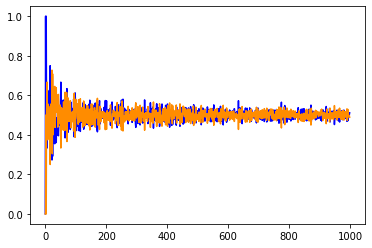

In [9]:
import random
import matplotlib.pyplot as plt

def flip_coins(n: int) -> dict:
    sample_space = ["H", "T"]
    heads_count = 0
    tails_count = 0
    heads_percent = 0
    tails_percent = 0
    for _ in range(n):
        if random.choice(sample_space) == "H":
            heads_count += 1
        else:
            tails_count += 1
    if heads_count != 0:
        heads_percent = heads_count/n
    if tails_count != 0:
        tails_percent = tails_count/n
    return {
        "percent_heads": heads_percent,
        "percent_tails": tails_percent
    }

def visualize_flips_over_trials():
    results = []
    num_trials = list(range(1000))
    for n in range(1000):
        results.append(flip_coins(n))
    heads = [elem["percent_heads"] for elem in results]
    tails = [elem["percent_tails"] for elem in results]
    plt.plot(num_trials, heads, color="blue")
    plt.plot(num_trials, tails, color="darkorange")
    plt.show()
    
visualize_flips_over_trials()

As you can see, we get pretty close to 50% for both heads and tails, we could keep running these trials and eventually it would get so close to 50% for each, you wouldn't tell the difference.  If we could take the trials to infinity, then it would go to strictly $\frac{1}{2}$ for both.  

Next we can extend this first discrete, honestly kinda boring distribution to a second more interesting discrete distribution - what happens when we want to know _predict the composition of the n trials_.  That is, can we figure out the probability that we would get 11 heads and 9 tails in 20 trials?

It turns out we can!  In fact there is a neat formula we can use:

$$ {n \choose k} p^{k} * q^{n - k} $$

Here n is the number of trials, k is the number of successes, p is the probability of success, q is the probability of failure.  So for 30 flips of a fair coin with 10 heads and heads being the success case, we can expect that to occur with probability:

$$ {30 \choose 10} * \frac{1}{2}^{10} * \frac{1}{2}^{20} $$ 

We'll use Python to reduce this to something clearer:

In [11]:
import math

def combination(n, r):
    return factorial(n)/(factorial(r) * factorial(n - r))

combination(30, 10) * math.pow(0.5, 10) * math.pow(0.5, 20)

0.02798160072416067

Wow!  Looks like it's _super_ unlikely we would only get 10 heads.  What if we split them evenly?

In [12]:
combination(30, 15) * math.pow(0.5, 15) * math.pow(0.5, 15)

0.14446444809436798

Well that's certainly a lot _more_ likely, but still not that likely, especially given the asymptotic behavior of a coin flip.  Let's increase the number of trials but stick with the 50% going to heads and 50% going to tails:

In [16]:
combination(1000, 500) * math.pow(0.5, 500) * math.pow(0.5, 500)

0.0252250181783608

What's happening here is the $\frac{1}{2}^{500}$ is dominating the equation, because ${1000 \choose 500}$ is:

In [17]:
combination(1000, 500)

2.7028824094543655e+299

A _very_ big number, but $\frac{1}{2}^{500}$ is a _very small number_:

In [18]:
math.pow(0.5, 500)

3.054936363499605e-151

And we are multiplying a very big number by _2_ small numbers, so the small numbers have a compounding effect.  Interestingly if we decrease the number of trials to 2 we get:

In [19]:
combination(2, 1) * math.pow(0.5, 1) * math.pow(0.5, 1)

0.5

Which agrees with our theoretical asymptotic behavior.  The reason the numbers don't act how you expect anymore is because we are being _precise_.  We aren't asking for approximately 500 head flips in 1000 trials, we are asking for _exactly_ 500 head flips in 1000 trials.  Since we are using a combination, we don't care about the _order_ of those 500 heads, but there must be _exactly_ 500.  This is why our probabilities get so small as our number of trials increase.  You can think of each trial as segmenting the sample space a little bit more.  For instance, let's suppose we started with small numbers:

Say we wanted the probability of 3 heads from 5 trials, what does that sample space look like now?  

Because it's a lot to write, we'll just look at one 'row':

```
Sample Space = {
    (H,H,H,H,H), (T,H,H,H,H), (T,T,H,H,H), (T,T,T,H,H), (T,T,T,T,H), (T,T,T,T,T)
}
```

In total our sample space contains $5^{2} = 25$ possible cases.  Recall that a single trial only has a sample space of 2 - so with only an increase of 4 trials, we've increased our sample space 12 fold.  That's alot!  As our number of trials increases, the size of our sample space increases _exponentially_.  That's why the probabilities get so small in our formula as the number of trials increases.

There is one last feature that's embedded in this formula - all of the trials are _independent_ that's why we can take _combinations_.  If there was a dependence structure then formula wouldn't apply.  This means, we can apply this formula to _any_ trials where the probability of the outcomes for a given event are known, and the trials are independent.  

Therefore we can think of this formula:

$$ {n \choose k} p^{k} * q^{n - k} $$

As a _model_ for any trials with two indepedent cases with known individual probabilities.  This model allows us to characterize more than the individual probabilities for a given event, by iterating over n and k, we can see the forest, we can see the 'shape' of the probability over the entire event space as the number of trials increases:

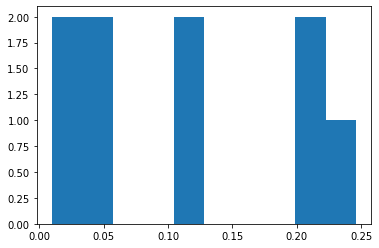

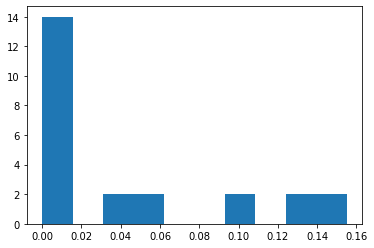

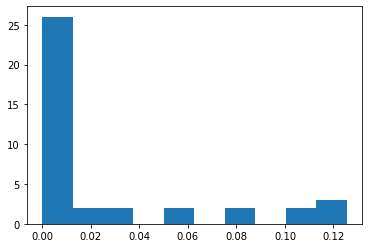

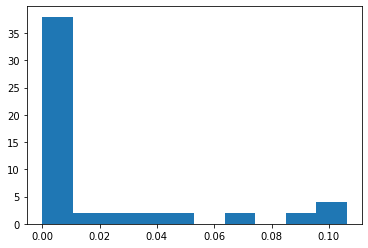

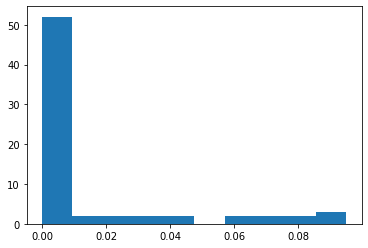

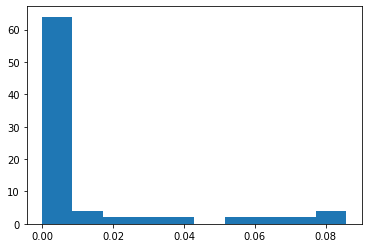

In [27]:
def probability(n: int, k: int, p: float, q: float) -> float:
    return combination(n, k) * math.pow(p, k) * math.pow(q, n - k)

def get_shape(n, p, q):
    probabilities = []
    for k in range(1, n):
        probabilities.append(
            probability(n, k, p, q)
        )
    return probabilities

for n in range(10, 100, 15):
    probabilities = get_shape(n, 0.5, 0.5)
    plt.hist(probabilities)
    plt.show()

As you can see, the individual probabilities get closer and close to 0 as the number of trials increases.  Is this always true?  What about if our probabilities were _very lopsided_:

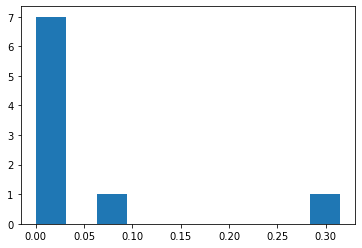

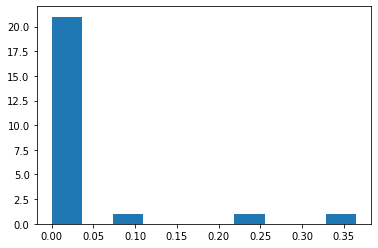

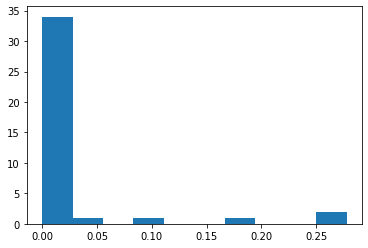

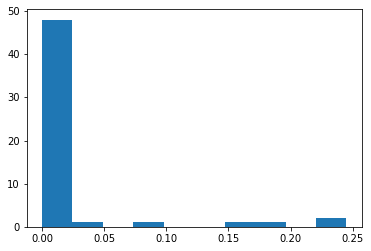

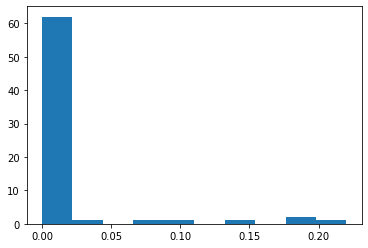

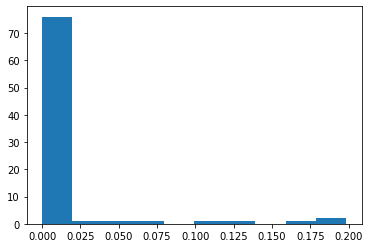

In [28]:
for n in range(10, 100, 15):
    probabilities = get_shape(n, 0.95, 0.05)
    plt.hist(probabilities)
    plt.show()

It's even worse if our probabilities are lopsided!  Anywho, there are lots of fun things you can do with distributions - if your distribution is a good model of the underlying thing, then you can use the distribution to run experiments on your computer, and you can learn about the real world!  Pretty neat, right?!

There are some other classes of events you should be aware of:

* those that follow the normal distribution
* those that follow the poisson distribution
* those that doesn't follow any distribution

The first two distributions are _continuous_ distributions, meaning they are modeled using real valued functions, and that they are good for modeling things can't be easily broken up into discrete events.  Typically with continuous random variables you talk about the probability of something happening below or above a threshold, or between two thresholds or outside two thresholds.  So for instance, suppose X was a continuous random variable then we might ask:

* $P(X < 5)$
* $P(X > 10)$ 
* $P(5 < X < 25)$
* $P(X < 5 \text{ } or \text{ } X > 15)$ 

The formula for the normal distribution is:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}} $$

Not an easy formula to understand!  

Here the parameter $\mu$ stands for the central tendency of the distribution, which in the case of the normal distribution is the arithmetic mean.

The parameter $\sigma$ stands for the spread of the distribution, which in the case of the normal distribution is the variance.

Here x is just a parameter to the function.  

Everything else is just a constant.  

By plugging all of these things into the equation, we are able to reconstruct _any_ normal distribution.  Let's look at an example:

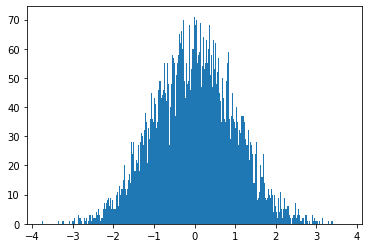

In [34]:
import numpy as np
import matplotlib.pyplot as plt

distribution = np.random.normal(0, 1, size=10000)
plt.hist(distribution, bins=500)
plt.show()

As you can see, the data is 'centered' around 0, which is the first parameter passed into the function `np.random.normal`, this is the central tendency $\mu$.  The second parameter gives us a sense of the spread - this is the parameter $\sigma$.

We don't typically need to pass in the parameter x in Python, that variable is _implicit_ to the formula.  We can also generate data that follows a poisson random variable just as easily:

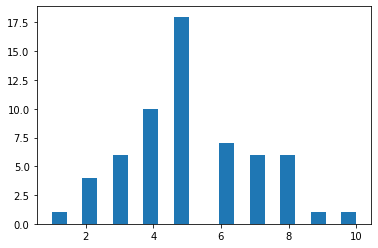

In [39]:
distribution = np.random.poisson(5, size=60)
plt.hist(distribution, bins=20)
plt.show()

Notice that a poisson random variable only depends on one parameter instead of two.  The distribution of data it generates is different, because there is a different underlying model.  The poisson variable is distributed according to this formula:

$$ P(x, \mu) = \frac{e^{-\mu}(\mu^{x})}{x!} $$

Here x is just the data being passed in.

The $\mu$ on the other hand, has a more interesting meaning, specifically it is the expected number of occurrences of the event over a given period.  Typically poisson random variables are used to measure events per time unit, like per minute or per hour or per year.  So if we expect 5 occurrences per hour, for instance, we can tell how many events are likely to occur - the above graph shows the likelihood of the number of events of interest occurring over a typical hour.  Notice that at 5 we have the densed count - because we _expect_ 5 events.  However, that doesn't mean that 4, or 6 events couldn't occur within the next hour.  However it is unlikely that 9 or 10 events.  

The way we create random or psuedo random numbers is fascinating, but honestly is _a lot to explain_ and this introductory chapter is already getting _very long_.  For those of you interested in how to generate numbers that don't follow a distribution please check out: https://www.youtube.com/watch?v=ovJcsL7vyrk&t=549s&ab_channel=Veritasium - in general Veritasium is a great channel and highly recommended by the author.

Note: This section takes part of it's inspiration from "Introduction to Probability" by Nelson Markley.

## Random Testing

Now that we've covered distributions, we can make use of them to inform testing.  Recall the simple sort algorithm we introduced at the beginning of the chapter:

In [2]:
def simple_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

For this algorithm we could only test 2 cases - when the list is already sorted, when the list is reversed.  But with distributions and the ability to generate _random_ data, we can test _many_ lists of numbers to confirm our algorithm is correct.

Here is a simple test that leverages randomness to test our sorting algorithm is correct:

In [8]:
import random

def test_simple_sort_three():
    array = [random.gauss(0, 5) for _ in range(1000)]
    sorted_array = array[:]
    sorted_array.sort()
    assert simple_sort(array) == sorted_array
    
test_simple_sort_three()

Notice that there was nothing _specific_ about the input.  We are able to do this because we have a correct sorting algorithm handy.  Since multiple algorithms can do the same thing, if you have one correct reference implementation that's all you need for testing purposes with random data.  There are many different correct sorting algorithms, each with their own running time, but all of them do the same thing.  That is, given an array of elements in some order, they will all return the array of elements in _sorted_ order.  

Continuing with this theme, let's look at our integer to binary code again:

In [11]:
import math

def integer_to_binary(number):
    if number == 0:
        return '0'
    biggest_power_of_two = math.log(number, 2)
    if biggest_power_of_two == math.ceil(biggest_power_of_two):
        upper_bound = int(biggest_power_of_two)
    else:
        upper_bound = math.floor(biggest_power_of_two)
    binary_representation = ""
    for i in range(upper_bound, -1, -1):
        power_of_two = math.pow(2, i)
        if power_of_two > number:
            binary_representation += "0"
        else:
            binary_representation += "1"
            number -= power_of_two
    return binary_representation

Now instead of testing interatively on a large set of numbers to verify some level of correctness, we will test on a much smaller set:

In [13]:
def strip_leading(string):
    return string.replace('0b', '')
    
def test_integer_to_binary():
    tested_numbers = []
    while True:
        random_number = random.randint(0, 50000000)
        if random_number in tested_numbers:
            continue
        python_version = bin(random_number)
        python_version = strip_leading(python_version)
        our_version = integer_to_binary(random_number)
        assert our_version == python_version
        tested_numbers.append(random_number)
        if len(tested_numbers) == 50:
            break

test_integer_to_binary()

By introducing a random number we were able to sample from a _much_ larger space of numbers.  But we only checked 50 cases instead of 5000.  This improves the confidence in our algorithm since we are drawing from a much larger set of choices.  As a consequence, we can test far fewer cases and be confident.

Asides:

* talk about psuedo number generators from veritasium
* talk about power law versus logarithm, do algorithms actually follow logs or can we show experimentally that a power law is more appropriate?

(do this after the final)